# RNN revise model

- Train, Valid, Test data를 처음부터 나누기
- padding 45로 줄이기
- X_data 정규화 진행X
<br><br>
- 참고
  - 'SimpleRNN_Test_Code_CPU.ipynb' 
  - https://wikidocs.net/22894 
  - https://katie0809.github.io/2020/02/17/ai-study4/ 





> ## 1. 전처리 패키지(Khaiii) Import

In [ ]:
!git clone https://github.com/kakao/khaiii.git

fatal: destination path 'khaiii' already exists and is not an empty directory.


In [ ]:
!pip install cmake

In [ ]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [ ]:
!cd build && cmake /content/khaiii

-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 0.16.3-p1)
-- Configuring done
-- Generating done
-- Build files have been written t

In [ ]:
!cd /content/build/ && make all

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii


In [ ]:
!cd /content/build/ && make resource

Built target resource


In [ ]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Up-to-date: /usr/local/include/khaiii
-- Up-to-date: /usr/local/include/khaiii/khaiii_dev.h
-- Up-to-date: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Up-to-date: /usr/local/include/khaiii/khaiii_api.h
-- Up-to-date: /usr/local/share/khaiii
-- Up-to-date: /usr/local/share/khaiii/conv.5.fil
-- Up-to-date: /usr/local/share/khaiii/config.json
-- Up-to-date: /usr/local/share/khaiii/embed.bin
-- Up-to-date: /usr/local/share/khaiii/restore.val
-- Up-to-date: /usr/local/share/khaiii/preanal.tri
-- Up-to-date: /usr/local/share/khaiii/conv.4.fil
-- Up-to-date: /usr/local/share/khaiii/cnv2hdn.lin
-- Up-to-date: /usr/local/share/khaiii/hdn2tag.lin
-- Up-to-date: /usr/local/share/khaiii/conv.3.fil
-- Up-to-date: /usr/local/share/khaiii/restore.key
-- Up-to-date: /usr/local/share/khaiii/preanal.val
-- Up-to-date: /usr/local/sh

In [ ]:
!cd /content/build && make package_python

Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [ ]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp37-none-any.whl size=22883022 sha256=528ae522d3b0de14b92bf5fdfac595d33fc57ff7be42b10459303d050aeb61a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-r12fo1ia/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii
  Found existing installation: khaiii 0.4
    Uninstalling khaiii-0.4:
      Successfully uninstalled khaiii-0.4


In [ ]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

> ## 2. 한글 폰트 설치

- 나눔폰트 설치

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

- 설치 확인

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/tr

In [ ]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용하려면 '런타임 다시 시작' 진행

Text(0.5, 1.0, '안녕')

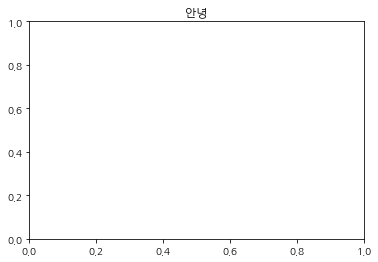

In [ ]:
plt.title('안녕')
# '안녕' 출력 확인

> ## 3. 데이터 불러오기



- dataset_final_Revise.xlsx

In [ ]:
import pandas as pd

df = pd.read_excel('dataset_final_Revise.xlsx', engine='openpyxl') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40644 entries, 0 to 40643
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sentence     40644 non-null  object 
 1   Emotion      40644 non-null  object 
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   3 non-null      object 
 4   Unnamed: 4   3 non-null      object 
 5   Unnamed: 5   3 non-null      object 
 6   Unnamed: 6   3 non-null      object 
 7   Unnamed: 7   3 non-null      object 
 8   Unnamed: 8   3 non-null      object 
 9   Unnamed: 9   3 non-null      object 
 10  Unnamed: 10  3 non-null      object 
dtypes: float64(1), object(10)
memory usage: 3.4+ MB


In [ ]:
df = df.loc[:,['Sentence', 'Emotion']]
df.head()

,Sentence,Emotion
0,게임방 가서 사광 클릭해서 대기 4600명 뚫고 성공,행복
1,신곡 지붕킥 하자,행복
2,VR로 즐길 듯 기대되네,행복
3,뒷북 꿀 잼,행복
4,굿 꿩 먹고 알 먹고 누이 좋고 매부 좋고,행복


In [ ]:
df['Emotion'] = df['Emotion'].replace(['공포','놀람','분노','슬픔','중립','혐오','행복'],[0,1,2,3,4,5,6])

In [ ]:
df.head()

,Sentence,Emotion
0,게임방 가서 사광 클릭해서 대기 4600명 뚫고 성공,6
1,신곡 지붕킥 하자,6
2,VR로 즐길 듯 기대되네,6
3,뒷북 꿀 잼,6
4,굿 꿩 먹고 알 먹고 누이 좋고 매부 좋고,6


In [ ]:
df.tail()

,Sentence,Emotion
40639,아무래도 너와는 음식의 방향성이 안 맞을 거 같아.,4
40640,음식 뿐만이 아닐텐데?,4
40641,"그나저나 그 밧줄, 어떻게 할 거야? 자살은 안 한다고 했지? 장난이라고 했잖아.",4
40642,"장난, 이긴 한데 나는 아마 그 결과를 못 볼거야. 그래서 네가 대신 확인해줬으면 ...",4
40643,어떤 장난이길래?,4


In [ ]:
print('총 샘플 수 : ', len(df))

총 샘플 수 :  40644


In [ ]:
# 중복 없는 문장 확인
df.nunique()

Sentence    39275
Emotion         7
dtype: int64

In [ ]:
# 중복 문장 제거 -> 369문장 삭제 됨
df.drop_duplicates(subset = ['Sentence'], inplace = True)
len(df)

39275

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39275 entries, 0 to 40643
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  39275 non-null  object
 1   Emotion   39275 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 920.5+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

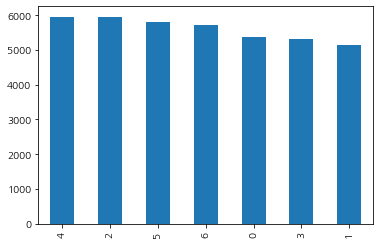

In [ ]:
df['Emotion'].value_counts().plot(kind = 'bar');

> ## 4. Train, Valid, Test Split(6 : 2 : 2)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, 
                                         test_size = 0.2,
                                         shuffle = False,
                                         random_state = 2045)

print(len(train_data))
print(len(test_data))

31420
7855


In [ ]:
train_data, valid_data = train_test_split(train_data, 
                                          test_size = 0.2,
                                          shuffle = False,
                                          random_state = 2045)

print(len(train_data))
print(len(valid_data))

25136
6284


In [ ]:
X_train = train_data['Sentence']
X_valid = valid_data['Sentence']
X_test = test_data['Sentence']
y_train = train_data['Emotion']
y_valid = valid_data['Emotion']
y_test = test_data['Emotion']

In [ ]:
print(X_train)
print(X_valid)
print(X_test)
print(y_train)
print(y_valid)
print(y_test)

0        게임방 가서 사광 클릭해서 대기 4600명 뚫고 성공
1                            신곡 지붕킥 하자
2                        VR로 즐길 듯 기대되네
3                               뒷북 꿀 잼
4              굿 꿩 먹고 알 먹고 누이 좋고 매부 좋고
                     ...              
26420                       운영자님 죄송합니다
26421    힘들게 준비한 노래 오늘 1위 못 시켜줘서 미안해요ㅠ
26422               저를 원망만 하고 엄청 밀어냅니다
26424                         욕해서 미안하다
26425                      참여 못해 죄송합니다
Name: Sentence, Length: 25136, dtype: object
26426            힘들게 데뷔한 앤데 안쓰럽다 ㅠㅠ
26427            새해 첫 사망자가 드디어 나왔구나
26428                      벌써 그립네요ㅠ
26429    함께 못해서 죄송해요 마음만은 광화문에 있습니다
26430      형님을 보면서 내가 나약했다는 자책을 합니다
                    ...            
32728        콘크리트 바닥들 좀 가리게 숲 좀 만들자
32729              그래택시비 좀 내립시 다 ㅋㅋ
32730               신규 직업 포켓 몬 트레이너
32731      기괴하고 이상한 영화들이 리스트에 많네요 ᄏ
32732     우물 안 개구리들이 소리 지르고 뛰어다니네ᄏᄏ
Name: Sentence, Length: 6284, dtype: object
32733                       한화 김성근 님의 장바구니에 고영민이 임시저장되었습니다
32734                      

In [ ]:
print(type(X_train))

<class 'pandas.core.series.Series'>


> ## 5. 카이 토큰화(형태소 분석) & 정수 인코딩 수행

> ### 1) 카이 토큰화

In [ ]:
def khaiii_tokenized(s):
  result = []                         # def 밑에 있어야 문장별로 리스트가 따로 들어간다 
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [ ]:
X_train_tokenized = X_train.apply(khaiii_tokenized)
X_valid_tokenized = X_valid.apply(khaiii_tokenized)
X_test_tokenized = X_test.apply(khaiii_tokenized)

In [ ]:
X_train_tokenized

0        [게임방, 가, 아서, 사광, 클릭, 하, 여서, 대기, 4600, 명, 뚫, 고,...
1                                          [신곡, 지붕킥, 하, 자]
2                              [VR, 로, 즐기, ㄹ, 듯, 기대, 되, 네]
3                                               [뒷북, 꿀, 잼]
4                [굿, 꿩, 먹, 고, 알, 먹, 고, 누이, 좋, 고, 매부, 좋, 고]
                               ...                        
26420                                 [운영자, 님, 죄송, 하, ㅂ니다]
26421    [힘들, 게, 준비, 하, ㄴ, 노래, 오늘, 1, 위, 못, 시키, 어, 주, 어...
26422                   [저, 를, 원망, 만, 하, 고, 엄청, 밀어, 냅, 니다]
26424                                   [욕하, 여서, 미안, 하, 다]
26425                            [참여, 못, 하, 여, 죄송, 하, ㅂ니다]
Name: Sentence, Length: 25136, dtype: object

In [ ]:
print(type(X_train_tokenized))

<class 'pandas.core.series.Series'>


- Series to List

In [ ]:
X_train_tokenized = X_train_tokenized.tolist()
X_valid_tokenized = X_valid_tokenized.tolist()
X_test_tokenized = X_test_tokenized.tolist()

In [ ]:
print(type(X_train_tokenized))

<class 'list'>


In [ ]:
X_train_tokenized

[['게임방', '가', '아서', '사광', '클릭', '하', '여서', '대기', '4600', '명', '뚫', '고', '성공'],
 ['신곡', '지붕킥', '하', '자'],
 ['VR', '로', '즐기', 'ㄹ', '듯', '기대', '되', '네'],
 ['뒷북', '꿀', '잼'],
 ['굿', '꿩', '먹', '고', '알', '먹', '고', '누이', '좋', '고', '매부', '좋', '고'],
 ['비', '좀', '와', '라', '좋', '은', '현상임', '굿굿'],
 ['나', 'ㄴ', '암전', '게임', '재밌', '었', '음', '재치', '있', '더라', '귀엽', '었', '음'],
 ['오', '선택', '잘', '하', '였', '다', '롱런하', '기', 'ㄹ'],
 ['커플', '대상', '응원', '하', 'ㅂ니다'],
 ['우리', '나', '란', '아직', '판매', '중', '희귀', '템', '구매원', '하', '면', '사면', '되', 'ㅁ'],
 ['하드캐리', '♡'],
 ['그나마', '다행히', '기각', '폰', '은', '안', '되', '었', '네', '탄핵', '폰'],
 ['운동복', '처럼', '쭉쭉', '늘어나', '는', '정장', '너무', '좋', '다'],
 ['나', '의', '멘토', '이', '자', '우상', '파이팅', '행복', '하', '시', '어요'],
 ['옛날',
  '부터',
  '존',
  '날',
  '이',
  'ㄴ데',
  '왜',
  '안',
  '뜨',
  '나',
  '하',
  '았었',
  '는데',
  '이번',
  '에',
  '배역',
  '제대로',
  '맡',
  '아서',
  '뜨',
  '나',
  '보다'],
 ['훈훈', '하', 'ㄴ', '비주얼', '에', '따뜻', '하', 'ㄴ', '연출', '기대', '하', 'ㄹ게', '이', '요'],
 ['떠나', 'ㄹ', '레전드', '감독', '의',

> ### 2) 정수인코딩

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tokenized) 
X_train = tokenizer.texts_to_sequences(X_train_tokenized) # 단어를 숫자값, 인덱스로 변환하여 저장
X_valid = tokenizer.texts_to_sequences(X_valid_tokenized)
X_test = tokenizer.texts_to_sequences(X_test_tokenized)

In [ ]:
print(X_train[:5])
print(X_valid[:5])
print(X_test[:5])

[[7719, 5, 78, 7720, 2773, 2, 94, 2307, 7721, 342, 2507, 6, 1007], [3556, 7722, 2, 131], [7723, 60, 2508, 8, 163, 431, 21, 30], [5403, 1109, 1432], [1661, 7724, 95, 6, 73, 95, 6, 5404, 56, 6, 7725, 56, 6]]
[[135, 16, 2331, 2, 3, 6095, 195, 3732, 11, 223], [1600, 727, 14537, 5, 701, 116, 36, 237], [372, 62, 1789, 30, 44, 49], [769, 82, 2, 94, 415, 2, 122, 216, 52, 14, 1710, 9, 20, 85], [213, 75, 15, 25, 168, 66, 5, 6557, 2, 47, 179, 15, 2, 50]]
[[1461, 4114, 75, 32, 9, 1, 21, 19, 85], [2968, 14, 228, 422, 61, 10, 7758, 750, 515, 1073, 755, 184, 202, 2, 17], [58, 286, 9, 1, 397, 3634, 2016, 5035, 2, 94, 1670, 10, 4388], [612, 10, 376, 3, 18, 60, 25, 160, 2, 43, 30], [14548, 14, 1322, 15, 3181, 4, 2267, 15, 42, 2, 6, 20, 85]]


In [ ]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

25136
6284
7855


- 어떤 단어에 어떤 정수가 부여 되었는지 확인
   - 빈도가 높을 수록 낮은 정수 부여
      - 1 ~ 16865번까지 존재

In [ ]:
word_to_index = tokenizer.word_index
len(word_to_index)

16865

In [ ]:
print(word_to_index)

{'이': 1, '하': 2, 'ㄴ': 3, '는': 4, '가': 5, '고': 6, '어': 7, 'ㄹ': 8, '에': 9, '도': 10, '다': 11, '아': 12, '지': 13, '은': 14, '을': 15, '게': 16, '나': 17, '것': 18, '었': 19, '있': 20, '되': 21, '들': 22, '거': 23, '?': 24, '보': 25, '.': 26, '어요': 27, '안': 28, '시': 29, '네': 30, '면': 31, '의': 32, '는데': 33, '야': 34, '여': 35, '았': 36, '뭐': 37, '!': 38, '를': 39, '아니': 40, '주': 41, '말': 42, '겠': 43, '요': 44, '없': 45, '왜': 46, '였': 47, '너': 48, 'ㅠ': 49, 'ㅂ니다': 50, '기': 51, '만': 52, '어서': 53, '너무': 54, '같': 55, '좋': 56, '오': 57, '저': 58, ',': 59, '로': 60, '으로': 61, '그': 62, '네요': 63, '정말': 64, '잘': 65, '내': 66, '냐': 67, 'ㄴ데': 68, '일': 69, '에서': 70, '않': 71, '사람': 72, '알': 73, '어떻': 74, '님': 75, '수': 76, '진짜': 77, '아서': 78, '지금': 79, '니': 80, '그렇': 81, '못': 82, '라': 83, '…': 84, '습니다': 85, '한': 86, '모르': 87, '좀': 88, '한테': 89, '라고': 90, '때': 91, 'ㄴ다': 92, '더': 93, '여서': 94, '먹': 95, '싶': 96, '그러': 97, '아요': 98, '제': 99, '까지': 100, '생각': 101, '살': 102, '여야': 103, '무슨': 104, '죠': 105, '다고': 106, '이렇': 107, '우리'

In [ ]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('전체 단어 수: ', total_cnt + 1) # 패딩을 위한 토큰인 0번 단어 고려 +1
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt)) # 빈도수 1인 단어 수
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100) # 전체 단어 중 빈도수 1회 단어가 72.6%나 된다.
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100) 

전체 단어 수:  16866
등장 빈도가 1번 이하인 희귀 단어의 수: 9147
단어 집합(vocabulary)에서 희귀 단어의 비율: 54.23658464275126
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.868675084206763


In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 16866


> ## 6. Padding

- Padding을 하기 위해 댓글 길이 분포를 살펴보자

댓글 최대 길이 : 130
댓글 평균 길이 : 12.685312


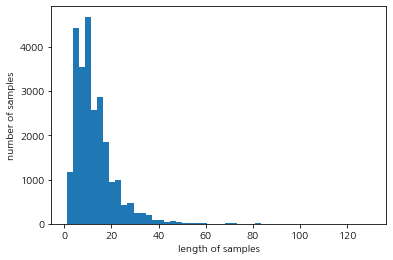

In [ ]:
print('댓글 최대 길이 : %d' %max(len(i) for i in X_train))
print('댓글 평균 길이 : %f' % (sum(map(len, X_train)) / len(X_train)))
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 45에 맞추어 Padding 진행

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 45
X_train = pad_sequences(X_train, maxlen = max_len)
X_valid = pad_sequences(X_valid, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

print('Train 데이터 크기(shape) : ', X_train.shape)
print('Valid 데이터 크기(shape) : ', X_valid.shape)
print('Test 데이터 크기(shape) : ', X_test.shape)

Train 데이터 크기(shape) :  (25136, 45)
Valid 데이터 크기(shape) :  (6284, 45)
Test 데이터 크기(shape) :  (7855, 45)


- y_data One_Hot_Encoding을 해야 한다.

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,7)
y_valid = to_categorical(y_valid,7)
y_test = to_categorical(y_test,7)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((25136, 45), (25136, 7), (6284, 45), (6284, 7), (7855, 45), (7855, 7))

> ## 7. 단어 임베딩 : Word2Vec 

In [ ]:
train_tokenized = X_train_tokenized + X_valid_tokenized

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = train_tokenized,
                 size = 45,
                 window = 3,
                 min_count = 1,
                 workers = 4,
                 sg = 1)  # sg=1 -> Skip-gram. CBOW보다 성능이 좋다. 

In [ ]:
model.wv.vocab

{'게임방': <gensim.models.keyedvectors.Vocab at 0x7fda1bb74390>,
 '가': <gensim.models.keyedvectors.Vocab at 0x7fda1bc187d0>,
 '아서': <gensim.models.keyedvectors.Vocab at 0x7fda1bc1d690>,
 '사광': <gensim.models.keyedvectors.Vocab at 0x7fda1af3ef90>,
 '클릭': <gensim.models.keyedvectors.Vocab at 0x7fda1af4b650>,
 '하': <gensim.models.keyedvectors.Vocab at 0x7fda1ac72690>,
 '여서': <gensim.models.keyedvectors.Vocab at 0x7fda1ac726d0>,
 '대기': <gensim.models.keyedvectors.Vocab at 0x7fda1ac72750>,
 '4600': <gensim.models.keyedvectors.Vocab at 0x7fda1af3ef10>,
 '명': <gensim.models.keyedvectors.Vocab at 0x7fda1ac72790>,
 '뚫': <gensim.models.keyedvectors.Vocab at 0x7fda1ac727d0>,
 '고': <gensim.models.keyedvectors.Vocab at 0x7fda1ac72810>,
 '성공': <gensim.models.keyedvectors.Vocab at 0x7fda1ac72850>,
 '신곡': <gensim.models.keyedvectors.Vocab at 0x7fda1ac72910>,
 '지붕킥': <gensim.models.keyedvectors.Vocab at 0x7fda1ac72950>,
 '자': <gensim.models.keyedvectors.Vocab at 0x7fda1ac72990>,
 'VR': <gensim.models.keye

In [ ]:
model.wv.vectors.shape

(20330, 45)

In [ ]:
print(model.wv.most_similar('♡'))

[('ㅠㅠㅠ', 0.949790358543396), ('ㅠㅠㅠㅠ', 0.9466620683670044), ('ㅠㅠㅠㅠㅠ', 0.9361708164215088), ('♡♡', 0.9271730184555054), ('파이팅', 0.9215370416641235), ('ㅡ', 0.913157045841217), ('ㅜ', 0.9113619923591614), ('센송', 0.9079795479774475), ('ㅜㅠ', 0.9060091376304626), ('ㅠㅠㅠㅠㅠㅠㅠㅠ', 0.9055208563804626)]


In [ ]:
print(model.wv.most_similar('축하'))

[('죄송', 0.9318010210990906), ('존경', 0.9211922883987427), ('부탁', 0.9177888035774231), ('응원', 0.907006561756134), ('생일', 0.9065908789634705), ('드', 0.9049978256225586), ('막막', 0.9012045860290527), ('감사', 0.8933901190757751), ('궁금', 0.8821291923522949), ('불안', 0.8762999773025513)]


In [ ]:
print(model.wv.most_similar('선수'))

[('미래', 0.9296541213989258), ('여러분', 0.929617166519165), ('팀', 0.9260693788528442), ('정보', 0.925057590007782), ('진정', 0.9229605197906494), ('언제나', 0.9218236207962036), ('모두', 0.9214237928390503), ('남편', 0.9178368449211121), ('아이', 0.9173228144645691), ('자신', 0.9143502712249756)]


In [ ]:
embedding_dim = 45

embedding_matrix = np.zeros((20330, embedding_dim))

for word, i in word_to_index.items():
  try:
    embedding_vector = model.wv.get_vector(word)
    embedding_matrix[i] = embedding_vector
    
  except KeyError:
    continue

> ## 8. RNN Modeling

> ### 1) Define

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import models
from keras import layers
from keras import backend as K
import tensorflow as tf

In [ ]:
# 필요할 때 쓰기
K.clear_session() 

Case_revise : 'RNN_HyperParameter.ipynb' 모델 중 좋았던 조합(Case_10) -> Batch_Normalization(Kernel_Regularizer) + Adam(Optimization_method)


In [ ]:
model = Sequential(name = 'RNN_Case_revise')
model.add(Embedding(20330, 45)) 
model.add(SimpleRNN(64))
model.add(layers.BatchNormalization())
model.add(Dense(7, activation = 'softmax'))

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [ ]:
model.summary()

Model: "RNN_Case_revise"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 45)          914850    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                7040      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 7)                 455       
Total params: 922,601
Trainable params: 922,473
Non-trainable params: 128
_________________________________________________________________


> ### 2) Compile 

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

> ### 3) EarlyStopping() & ModelCheckpoint()





In [ ]:
es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max',
                   patience = 10,
                   verbose = 1)

mc = ModelCheckpoint('RNN_model_revise.h5' ,
                     monitor = 'val_accuracy' ,
                     mode = 'max' ,
                     save_best_only = True ,
                     verbose = 1)

> ### 4) Fit

- Case_revise : Batch + Adam
  - 약 3분

In [ ]:
%%time
history_W2V = model.fit(X_train, y_train, 
                        epochs = 60, 
                        batch_size = 100, 
                        validation_data = (X_valid, y_valid),
                        callbacks = [es, mc],
                        verbose = 1)

Epoch 1/60
252/252 [==============================] - 15s 43ms/step - loss: 1.6929 - accuracy: 0.3880 - val_loss: 3.4867 - val_accuracy: 0.0414

Epoch 00001: val_accuracy improved from -inf to 0.04137, saving model to RNN_model_revise.h5
Epoch 2/60
252/252 [==============================] - 11s 42ms/step - loss: 1.0908 - accuracy: 0.5867 - val_loss: 4.2617 - val_accuracy: 0.0735

Epoch 00002: val_accuracy improved from 0.04137 to 0.07352, saving model to RNN_model_revise.h5
Epoch 3/60
252/252 [==============================] - 11s 42ms/step - loss: 0.8940 - accuracy: 0.6649 - val_loss: 4.6643 - val_accuracy: 0.0711

Epoch 00003: val_accuracy did not improve from 0.07352
Epoch 4/60
252/252 [==============================] - 11s 42ms/step - loss: 0.7271 - accuracy: 0.7340 - val_loss: 5.1757 - val_accuracy: 0.1354

Epoch 00004: val_accuracy improved from 0.07352 to 0.13542, saving model to RNN_model_revise.h5
Epoch 5/60
252/252 [==============================] - 11s 42ms/step - loss: 0.60

> ### 5) Visualization

- Accuaracy & Loss



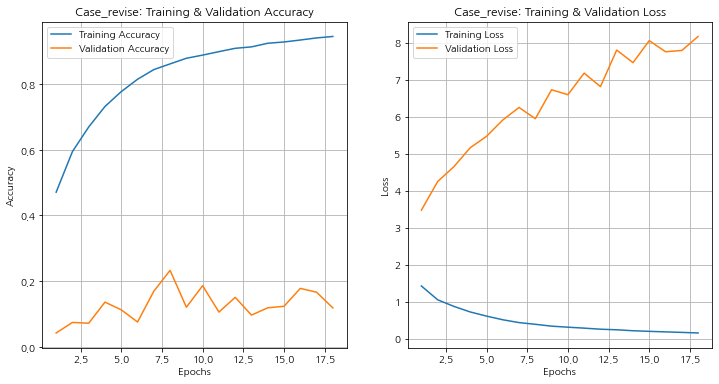

In [ ]:
epochs1 = range(1, len(history_W2V.history['val_accuracy']) + 1)
epochs2 = range(1, len(history_W2V.history['val_loss']) + 1)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs1, history_W2V.history['accuracy'])
plt.plot(epochs1, history_W2V.history['val_accuracy'])
plt.title('Case_revise: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs2, history_W2V.history['loss'])
plt.plot(epochs2, history_W2V.history['val_loss'])
plt.title('Case_revise: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.show()

> ### 6) Predict

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

246/246 [==============================] - 1s 5ms/step - loss: 8.6418 - accuracy: 0.0191
Loss = 8.64176
Accuracy = 0.01910


> ## 8. Test



In [ ]:
def sentiment_predict(sentence):
  sentence = sentence.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z♡ ]', '')
  sentence = khaiii_tokenized(sentence)
  encoded = tokenizer.texts_to_sequences([sentence])
  pad_sentence = pad_sequences(encoded, maxlen=max_len)
  result = model.predict(pad_sentence)
  print(f'공포: {result[0][0]:.5f}')
  print(f'놀람: {result[0][1]:.5f}')
  print(f'분노: {result[0][2]:.5f}')
  print(f'슬픔: {result[0][3]:.5f}')
  print(f'중립: {result[0][4]:.5f}')
  print(f'혐오: {result[0][5]:.5f}')
  print(f'행복: {result[0][6]:.5f}')

In [ ]:
# 공포1 : 공포, 놀람, 슬픔을 헷갈리는 듯
sentence = '아니 진짜 너무 무서운데ㅜㅜ'
sentiment_predict(sentence)

공포: 0.18513
놀람: 0.52061
분노: 0.00017
슬픔: 0.29381
중립: 0.00026
혐오: 0.00001
행복: 0.00000


In [ ]:
# 공포2 : 불안감을 나타내는 문장은 공포로 잘 분류한다. 
sentence = '나 내일 시험 떨어지면 어떡하지'
sentiment_predict(sentence)

공포: 0.88609
놀람: 0.00147
분노: 0.00031
슬픔: 0.00048
중립: 0.00001
혐오: 0.00023
행복: 0.11142


In [ ]:
# 놀람 
sentence = '별일이네, 네가 아침밥을 다 먹고'
sentiment_predict(sentence)

공포: 0.04785
놀람: 0.92286
분노: 0.02912
슬픔: 0.00017
중립: 0.00000
혐오: 0.00000
행복: 0.00000


In [ ]:
# 분노 
sentence = '진짜..쓰레기 기업이네'
sentiment_predict(sentence)

공포: 0.00018
놀람: 0.05307
분노: 0.90819
슬픔: 0.00054
중립: 0.00018
혐오: 0.03600
행복: 0.00183


In [ ]:
# 슬픔 
sentence = '유독 슬프게 다가오는 두 배우의 눈빛과 아름다운 영상미'
sentiment_predict(sentence)

공포: 0.00000
놀람: 0.00001
분노: 0.00000
슬픔: 0.00000
중립: 0.00000
혐오: 0.00000
행복: 0.99999


In [ ]:
# 중립1 
sentence = '그들의 삶을 있는 그대로 보여준 영화'
sentiment_predict(sentence)

공포: 0.00054
놀람: 0.00056
분노: 0.00008
슬픔: 0.00004
중립: 0.00000
혐오: 0.00265
행복: 0.99613


In [ ]:
# 중립2 : 중립을 잘 분류하지 못한다.
sentence = '내 핸드폰은 갤럭시 기종이다.'
sentiment_predict(sentence)

공포: 0.00000
놀람: 0.00046
분노: 0.93633
슬픔: 0.00001
중립: 0.00001
혐오: 0.00021
행복: 0.06298


In [ ]:
# 혐오1 : 분노와 헷갈리는 듯
sentence = '넌 머리가 왜 그렇게 나쁘냐'
sentiment_predict(sentence)

공포: 0.00005
놀람: 0.18211
분노: 0.81725
슬픔: 0.00037
중립: 0.00003
혐오: 0.00017
행복: 0.00002


In [ ]:
# 혐오2 : 분노와 헷갈리는 듯
sentence = '야 기래기야 부럽냐?'
sentiment_predict(sentence)

공포: 0.00057
놀람: 0.13572
분노: 0.78400
슬픔: 0.00366
중립: 0.00009
혐오: 0.00069
행복: 0.07528


In [ ]:
# 행복
sentence = '나 기분이 너무 좋아'
sentiment_predict(sentence)

공포: 0.00068
놀람: 0.01987
분노: 0.26328
슬픔: 0.00311
중립: 0.00008
혐오: 0.00384
행복: 0.70914


In [ ]:
# 행복
sentence = '나돜ㅋㅋㅋㅋㅋㅋㅋ 유야호 하는 부분 보려고 계속 재생중임ㅋㅋㅋㅋㅋ'
sentiment_predict(sentence)

공포: 0.00001
놀람: 0.99997
분노: 0.00002
슬픔: 0.00000
중립: 0.00000
혐오: 0.00000
행복: 0.00000


> ## 결론 

- 공포(0), 놀람(1), 분노(2), 슬픔(3), 중립(4), 혐오(5), 행복(6)
- <Word2Vec + train, valid, test 처음부터 나누기 + padding 45로 줄이기>로 수정해서 진행했는데, 성능은 오히려 떨어졌다. 
   - 하지만, 테스트에선 word2vec만 진행했을 때보다 나았다. 
   - 슬픔, 중립, 혐오는 잘 분류하지 못했고, 분노는 불안감을 드러낼 때 잘 분류했다. 행복은 놀람과 헷갈려 하는 부분이 있다.  

- 감정의 범주를 5, 3개로 줄여서 진행해보겠다.

> ## 9. 모델 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 764567
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3

- ValueError : Weights for model RNN_Case_11 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`. -> 왼쪽 파일탭에 들어와 있었음. 해결

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/RNN_model_revise.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 793683
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3